In [1]:
from model import DenseNet,PPGNet
from torch.utils.data import Dataset
import torch
from torchviz import make_dot
from torchsummary import summary
import pickle
import numpy as np
from copy import copy

from ppg_sig_fea import ThreeModel
from torchsummary import summary

from tqdm import tqdm

module = __import__("ppg+sig+fea_bef+now+nex")
ThreeEncoder = module.ThreeEncoder

In [2]:
data_path = '../da300s/'

mode = 'train'
with open(data_path + 'mesa/'+mode+'_fea.pkl', 'rb') as f:
    fea = pickle.load(f)
with open(data_path + 'mesa/'+mode+'_sig.pkl', 'rb') as f:
    sig = pickle.load(f)
with open(data_path + 'mesa/'+mode+'_ppg.pkl', 'rb') as f:
    ppg = pickle.load(f)
with open(data_path + 'mesa/'+mode+'_std.pkl', 'rb') as f:
    std = pickle.load(f)
with open(data_path + 'mesa/'+mode+'_ref.pkl', 'rb') as f:
    ref = pickle.load(f)

mode = mode + '_exc'
with open(data_path + 'mesa/'+mode+'_label.pkl', 'rb') as f:
    test_label = pickle.load(f)

mask = torch.ones(32, dtype=torch.bool)
mask[[22, 30]] = False

test_label = np.c_[test_label, np.zeros([len(test_label),1], dtype=int)]
test_label = np.c_[test_label, np.zeros([len(test_label),1], dtype=int)]
#8: predict, 9: acc

In [2]:
import torch
model = torch.load('tfboard/mesa/ResHybridAtt/20240820-153351/saved_models/fold_0_epoch_6.pth')

FileNotFoundError: [Errno 2] No such file or directory: 'tfboard/mesa/ResHybridAtt/20240820-153351/saved_models/fold_0_epoch_6.pth'

In [27]:
model = model.module

In [29]:
model.ppg_model()

TypeError: forward() missing 1 required positional argument: 'x'

In [ ]:
for i in tqdm(range(len(test_label))):
    
    ref_now = ref[test_label[i, 7]]
    
    ppg_now = ppg[ref_now][int(test_label[i, 0]): int(test_label[i, 1])]
    sig_now = sig[ref_now][:, int(test_label[i, 2]): int(test_label[i, 3])]
    fea_now = fea[ref_now][:, int(test_label[i, 4]): int(test_label[i, 5])]

    ppg_now = (ppg_now - std[2][ref_now][0:1])/std[2][ref_now][1:2]
    sig_now = (sig_now - std[1][ref_now][:,0:1])/std[1][ref_now][:,1:2]
    fea_now = (fea_now - std[0][ref_now][:,0:1])/std[0][ref_now][:,1:2]

    fea_now = fea_now[mask]

    ppg_now = ppg_now.unsqueeze(0)
    if(ppg_now.isnan().any() or sig_now.isnan().any() or fea_now.isnan().any()):
        test_label[i, 8] = -1
        continue

    resu = model(ppg_now.unsqueeze(0).float(), sig_now.unsqueeze(0).float(), fea_now.unsqueeze(0).float())[1]
    test_label[i, 8] = torch.max(resu[:, 0, :4], dim=1).indices[0].tolist()
    

 11%|███████▊                                                                | 138432/1277075 [24:40<3:26:22, 91.96it/s]

In [9]:
[i[6]==i[8] for i in test_label[:10]]

[True, True, False, True, True, True, True, False, True, False]

In [7]:
1

1

In [69]:
resu = model(torch.rand([1, 1, 64 * 300]), torch.rand([1, 4, 300]), torch.rand([1, 30, 28]))[1]#[:, 0, :4]

In [7]:
temp = torch.rand([1, 1, 64 * 300])

In [8]:
from copy import copy

In [10]:
copy(temp).cuda()

tensor([[[0.3563, 0.9188, 0.7598,  ..., 0.0431, 0.6197, 0.1417]]])

In [17]:
len(temp.shape)

3

In [ ]:
torch.nn.parall

In [74]:
resu[:, 0, :4]

tensor([[-0.7403, -0.4199, -0.9260,  0.8316]], grad_fn=<SliceBackward0>)

In [83]:
torch.max(resu[:, 0, :4], dim=1).indices[0].tolist()

3

In [45]:
len(test_label)

1277075

In [8]:
stage_len = list()
for i in range(4):
    stage_len.append(list())

In [10]:
int(test_label[0, 6])

1

In [21]:
np.unique(test_label[:,8])

array(['-1', '0', '1', '2', '3'], dtype='<U21')

In [26]:
test_label[:,9] = test_label[:,8] == test_label[:,6]

In [34]:
np.save('temp.npy', test_label)

In [35]:
test

array([['3840', '23040', '60', ..., '0001', '1', 'True'],
       ['5760', '24960', '90', ..., '0001', '1', 'True'],
       ['7680', '26880', '120', ..., '0001', '3', 'False'],
       ...,
       ['1399680', '1418880', '21870', ..., '6812', '2', 'False'],
       ['1401600', '1420800', '21900', ..., '6812', '2', 'False'],
       ['1403520', '1422720', '21930', ..., '6812', '2', 'False']],
      dtype='<U21')

In [23]:
stage_len = list()
for i in range(4):
    stage_len.append(list())
    
i = 0
while i + 1 < len(test_label):
    stage_count = 0
    while( i+1 < len(test_label)
        and (test_label[i, 7] == test_label[i+1, 7]) 
        and (test_label[i, 6] == test_label[i+1, 6])):
        stage_count = stage_count + 1
        i = i + 1
    stage_len[int(test_label[i, 6])].append(stage_count)
    
    i = i + 1

In [26]:
np.unique(stage_len[0], return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 163, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 177, 178, 179, 180

In [42]:
char_counts = np.unique(stage_len[1], return_counts=True)

print(dict(zip(char_counts[0], char_counts[1])))

{0: 192, 1: 196, 2: 293, 3: 251, 4: 297, 5: 275, 6: 268, 7: 276, 8: 260, 9: 275, 10: 236, 11: 221, 12: 217, 13: 208, 14: 203, 15: 216, 16: 213, 17: 200, 18: 213, 19: 185, 20: 168, 21: 183, 22: 188, 23: 180, 24: 174, 25: 190, 26: 174, 27: 152, 28: 143, 29: 168, 30: 165, 31: 139, 32: 147, 33: 151, 34: 135, 35: 147, 36: 111, 37: 133, 38: 136, 39: 122, 40: 103, 41: 116, 42: 123, 43: 117, 44: 129, 45: 107, 46: 97, 47: 101, 48: 106, 49: 91, 50: 76, 51: 92, 52: 83, 53: 97, 54: 102, 55: 96, 56: 98, 57: 84, 58: 95, 59: 85, 60: 97, 61: 94, 62: 100, 63: 92, 64: 90, 65: 79, 66: 65, 67: 80, 68: 91, 69: 87, 70: 67, 71: 72, 72: 75, 73: 54, 74: 73, 75: 65, 76: 66, 77: 71, 78: 58, 79: 69, 80: 62, 81: 67, 82: 57, 83: 78, 84: 74, 85: 62, 86: 50, 87: 56, 88: 65, 89: 61, 90: 51, 91: 60, 92: 65, 93: 62, 94: 52, 95: 51, 96: 51, 97: 51, 98: 42, 99: 64, 100: 52, 101: 49, 102: 44, 103: 51, 104: 49, 105: 39, 106: 61, 107: 39, 108: 46, 109: 33, 110: 38, 111: 40, 112: 49, 113: 39, 114: 44, 115: 28, 116: 32, 117: 3

In [44]:
np.sum(char_counts[1])

14818

In [38]:
len(char_counts[0])

303

In [37]:
resu = 0
for i in range(len(char_counts[0])):
    resu = resu + (char_counts[0][i]+1)*char_counts[1][i]
resu

781734

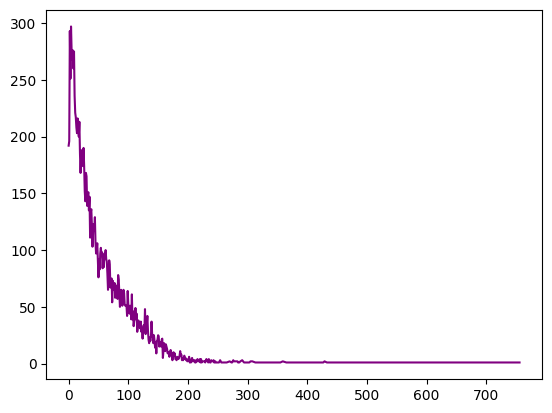

In [31]:
import matplotlib.pyplot as plt
ax = plt.axes()
ax.plot(char_counts[0], char_counts[1], color='purple' )#i
plt.show()

In [40]:
char_counts = np.unique(stage_len[2], return_counts=True)

resu = 0
for i in range(len(char_counts[0])):
    resu = resu + (char_counts[0][i]+1)*char_counts[1][i]
resu

77911

In [39]:
np.unique(stage_len[2], return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  95,  96,  97, 100, 102, 103, 105, 107, 108, 110,
        114, 117, 167, 189]),
 array([ 98, 114, 137, 132, 140, 121, 110, 122, 132, 105,  95, 101,  79,
         87,  76,  92,  61,  56,  56,  56,  73,  65,  61,  50,  45,  52,
         59,  47,  48,  48,  36,  40,  34,  35,  32,  35,  27,  39,  28,
         27,  23,  24,  22,  26,  26,  25,  18,  15,  19,  24,  17,  14,
         18,  20,  21,  14,  15,  21,  22,   8,  10,   8,   8,  14,   8,
          9,   7,   7

In [29]:
np.unique(stage_len[3], return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 117, 118,
        122, 128, 130, 131, 132, 134, 166, 168, 171, 173, 253]),
 array([ 39,  54, 138, 113, 130, 118, 117, 122, 137, 116, 127, 140, 119,
        123, 107, 140, 111, 133, 114, 124, 106, 125, 122, 137, 105, 122,
        111,  99, 117, 116, 103,  98, 100, 100,  89,  85,  91,  82,  85,
         94,  70,  65,  70,  73,  49,  72,  65,  47,  42,  